https://www.cfa.harvard.edu/castles/

In [1]:
pwd

'/Users/abombrun/IPythonNB/Projects/Preparation'

In [2]:
%matplotlib inline
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
import matplotlib as mp

mp.rcParams['figure.figsize'] = (12, 8)

In [3]:
Lqso = pd.read_csv("lensedQSO.csv",sep='\t',skipinitialspace=True)

In [4]:
Lqso.columns

Index(['#', 'Image', 'Lens Name', 'G', 'zs', 'zl', 'RA (J2000)', 'Dec (J2000)',
       'E(B-V)', 'ms (mag)', 'ml (mag)', 'FGHz (mJy)', 'Nim', 'size (")',
       'dt (days)', 'sigma (km/s)'],
      dtype='object')

In [5]:
Lqso.columns = ['#', 'Image', 'name', 'G', 'zs', 'zl', 'Ra', 'Dec',
       'Ext', 'ms', 'ml', 'FGHz', 'Nim', 'dl',
       'dt', 'sigma']

number of confirmed lensed

In [6]:
Lqso[Lqso.G=='A'][:10]

,#,Image,name,G,zs,zl,Ra,Dec,Ext,ms,ml,FGHz,Nim,dl,dt,sigma
0,1,NaN,Q0047-2808,A,3.60,0.48,00:49:41.89,-27:52:25.7,0.016,NaN,I=20.05,NaN,4ER,2.70,NaN,229±15
1,2,NaN,HE0047-1756,A,1.66,0.41,00:50:27.83,-17:40:8.8,0.022,I=16.53/2,I=18.97,NaN,2,1.44,NaN,NaN
5,6,NaN,PMNJ0134-0931,A,2.216,0.77,01:34:35.67,-09:31:02.9,0.031,I=18.96/4,I=19.31,F5=529,5R,0.73,NaN,NaN
6,7,NaN,Q0142-100,A,2.72,0.49,01:45:16.5,-09:45:17,0.031,I=16.47/2,I=18.72,F5~1,2,2.24,NaN,NaN
7,8,NaN,QJ0158-4325,A,1.29,0.317,01:58:41.44,-43:25:04.20,0.015,I=17.39/2,I=18.91,F8<0.2,2,1.22,NaN,NaN
8,9,NaN,B0218+357,A,0.96,0.68,02:21:05.483,+35:56:13.78,0.068,I=19.28/2,I=20.06,F5=1209,2ER,0.34,10.5±0.4,NaN
9,10,NaN,HE0230-2130,A,2.162,0.52,02:32:33.1,-21:17:26,0.022,I=18.00/4,I=20.39,NaN,4,2.05,NaN,NaN
10,11,NaN,SDSS0246-0825,A,1.68,NaN,02:46:34.11,-08:25:36.2,0.026,I=16.98/2,I=20.82,NaN,2,1.19,NaN,NaN
12,13,NaN,J0332-2756,A,NaN,0.617,03:32:38.22,-27:56:52.9,0.008,V=-1.95/6,V=20.74,NaN,2E,3.64,NaN,NaN
13,14,NaN,MG0414+0534,A,2.64,0.96,04:14:37.73,+05:34:44.3,0.303,I=19.62/4,I=20.91,F5=977,4E,2.40,NaN,NaN


In [7]:
Lqso.Ra = Lqso.Ra.apply(str)
Lqso.Dec = Lqso.Dec.apply(str)
Lqso['ra_deg'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).ra.deg
Lqso['dec_deg'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).dec.deg
Lqso['ra'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).ra.rad
Lqso['dec'] = SkyCoord(Lqso.Ra.values,Lqso.Dec.values,unit=(u.hourangle, u.deg)).dec.rad

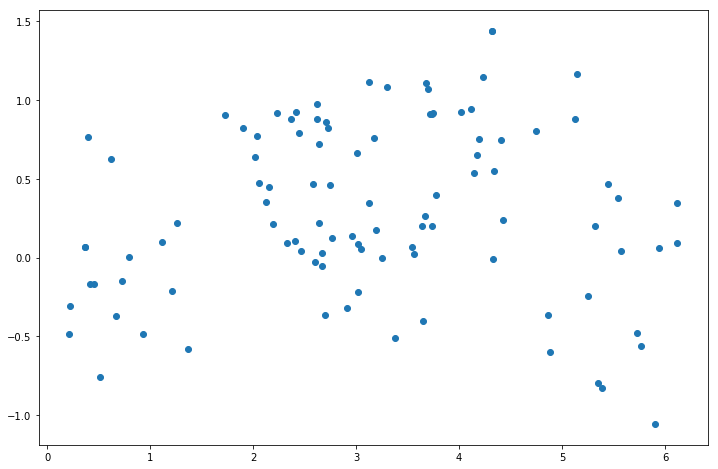

In [8]:
scale = u.deg.to(u.rad)
plt.scatter(Lqso.ra_deg*scale,Lqso.dec_deg*scale)

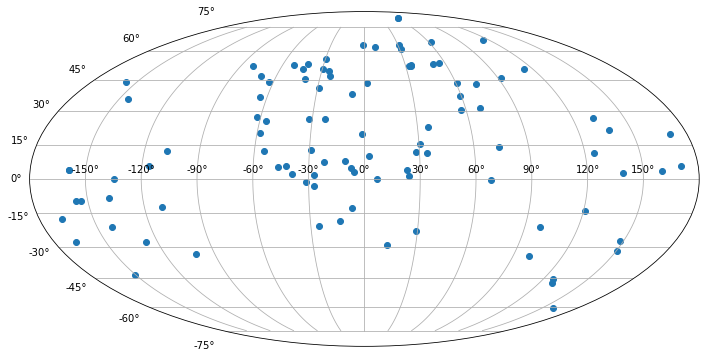

In [9]:
plt.subplot(111,projection="mollweide")
plt.scatter(Lqso.ra-np.pi,Lqso.dec)
plt.grid()

In [10]:
Lqso[Lqso.dl>5]

,#,Image,name,G,zs,zl,Ra,Dec,Ext,ms,ml,FGHz,Nim,dl,dt,sigma,ra_deg,dec_deg,ra,dec
30,31,NaN,RXJ0921+4529,B,1.65,0.31,09:21:12.81,+45:29:04.4,0.018,I=17.74/3,I=20.24,NaN,2,6.97,NaN,NaN,140.303375,45.484556,2.448756,0.793855
34,35,NaN,Q0957+561,A,1.41,0.36,10:01:20.78,+55:53:49.4,0.009,I=15.99/2,I=17.12,F5=65.6,2E,6.26,417.0±3.0,288±9,150.336583,55.897056,2.623868,0.975588
37,38,NaN,SDSS1004+4112,A,1.734,0.68,10:04:34.91,+41:12:42.8,0.013,i=17.53/4,i=18.42,NaN,4,15.99,821.6±2.1,NaN,151.145458,41.211889,2.637986,0.719283
43,44,NaN,SDSS1029+2623,A,2.197,0.55,10:29:13.35,+26:23:31.8,0.022,NaN,NaN,NaN,4,22.50,746.±10.,NaN,157.305625,26.392167,2.745501,0.460630


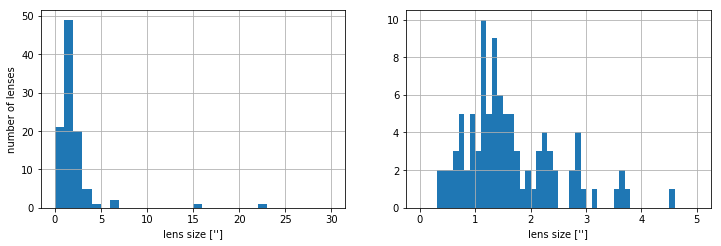

In [11]:
plt.subplot(221)
Lqso.dl.hist(bins=30,range=(0,30))
plt.xlabel("lens size ['']")
plt.ylabel("number of lenses")

plt.subplot(222)
Lqso.dl.hist(bins=50,range=(0,5))
plt.xlabel("lens size ['']")

In [12]:
from pyparsing import nestedExpr

In [13]:
def parseZ(s):
    """ parse crazy values"""
    ss = str(s)
    try :
        if '(' in ss :
            res = nestedExpr('(',')').parseString(ss).asList()
            return np.double(res[0][0])
        return np.double(ss)
    except :
        return np.nan

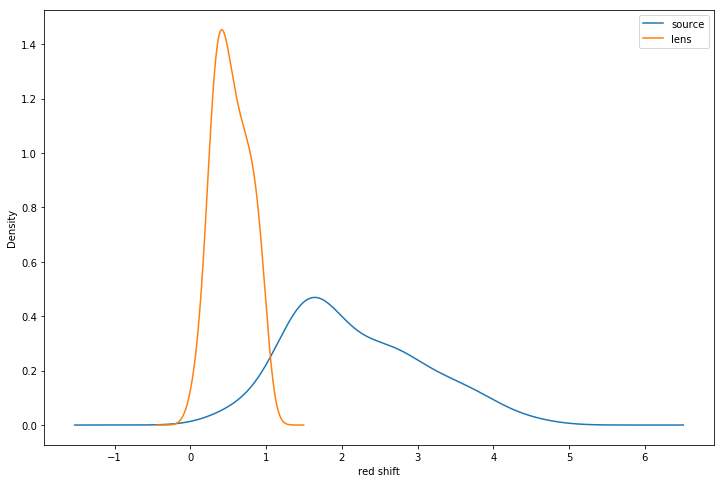

In [14]:
Lqso.zs.apply(parseZ).plot.kde(label="source")
Lqso.zl.apply(parseZ).plot.kde(label="lens")
plt.xlabel("red shift")
plt.legend()

In [16]:
Lqso.to_csv("Lqso.csv")